In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.linalg
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelBinarizer
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train=pd.read_excel('./train.xlsx') # 데이터 불러오기

In [3]:
## 데이터 분석
train.info() # 데이터 확인 & 결측값 유무 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          16512 non-null  int64  
 1   longitude           16512 non-null  float64
 2   latitude            16512 non-null  float64
 3   housing_median_age  16512 non-null  int64  
 4   total_rooms         16512 non-null  int64  
 5   total_bedrooms      16354 non-null  float64
 6   population          16512 non-null  int64  
 7   households          16512 non-null  int64  
 8   median_income       16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
 10  target              16512 non-null  int64  
dtypes: float64(4), int64(6), object(1)
memory usage: 1.4+ MB


In [4]:
train=train.drop(train.columns[0],axis=1) # 첫번째 열 (데이터 번호) 제거
train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,target
0,-121.89,37.29,38,1568,351.0,710,339,2.7042,<1H OCEAN,286600
1,-121.93,37.05,14,679,108.0,306,113,6.4214,<1H OCEAN,340600
2,-117.20,32.77,31,1952,471.0,936,462,2.8621,NEAR OCEAN,196900
3,-119.61,36.31,25,1847,371.0,1460,353,1.8839,INLAND,46300
4,-118.59,34.23,17,6592,1525.0,4459,1463,3.0347,<1H OCEAN,254500


In [5]:
train=train.dropna(axis=0) # 결측값이 있는 행 제거
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16354 entries, 0 to 16511
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16354 non-null  float64
 1   latitude            16354 non-null  float64
 2   housing_median_age  16354 non-null  int64  
 3   total_rooms         16354 non-null  int64  
 4   total_bedrooms      16354 non-null  float64
 5   population          16354 non-null  int64  
 6   households          16354 non-null  int64  
 7   median_income       16354 non-null  float64
 8   ocean_proximity     16354 non-null  object 
 9   target              16354 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.4+ MB


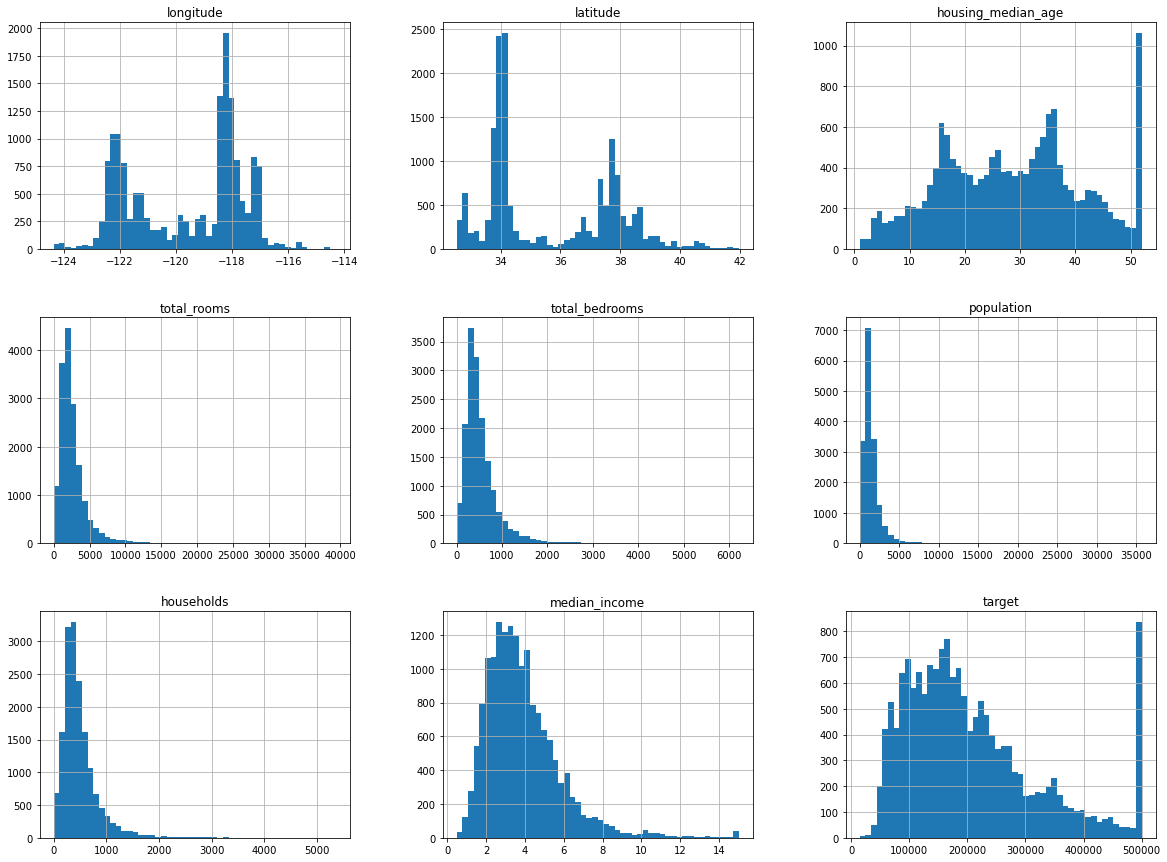

In [6]:
# 각 특성의 분포 확인
train.hist(bins=50,figsize=(20,15))
plt.show()

In [7]:
train.describe() # 각 특성의 scale이 서로 다름

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,target
count,16354.000000,16354.000000,16354.000000,16354.000000,16354.000000,16354.000000,16354.000000,16354.000000,16354.000000
mean,-119.575471,35.639354,28.641556,2624.246117,534.973890,1419.158860,496.999266,3.876957,207067.474502
std,2.001732,2.138251,12.581040,2141.933421,412.699041,1115.860053,375.485182,1.904516,115785.425009
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,-121.800000,33.940000,18.000000,1445.000000,295.000000,784.000000,279.000000,2.567000,119625.000000
50%,-118.510000,34.260000,29.000000,2120.000000,433.000000,1164.000000,408.000000,3.543900,179500.000000
75%,-118.010000,37.720000,37.000000,3139.750000,644.000000,1716.000000,602.000000,4.747150,263900.000000
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000


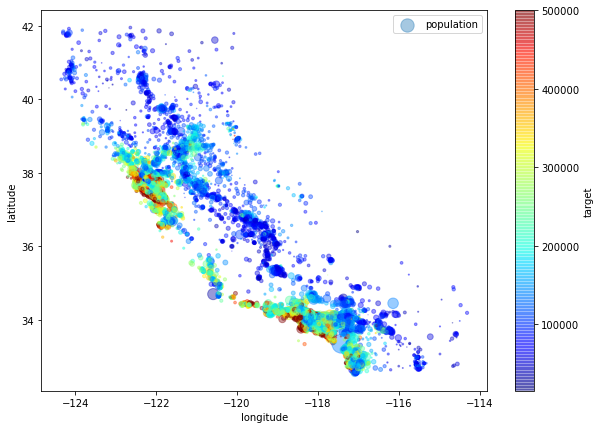

In [13]:
train.plot(kind='scatter',x='longitude',y='latitude',alpha=0.4,s=train['population']/100,label='population',
          figsize=(10,7),c='target',cmap=plt.get_cmap('jet'),colorbar=True,sharex=False)
plt.legend()
plt.show()

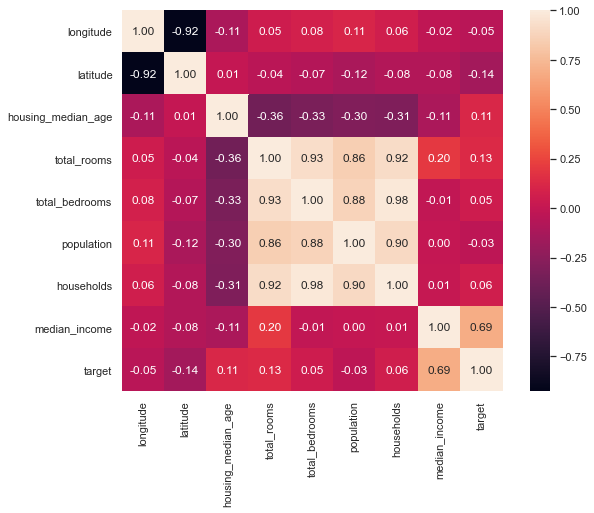

In [14]:
# 특성 간의 표준 상관계수
sns.set()
plt.figure(figsize=(10,7))
sns.heatmap(train.corr(),annot=True,fmt='.2f',square=True)
plt.show()

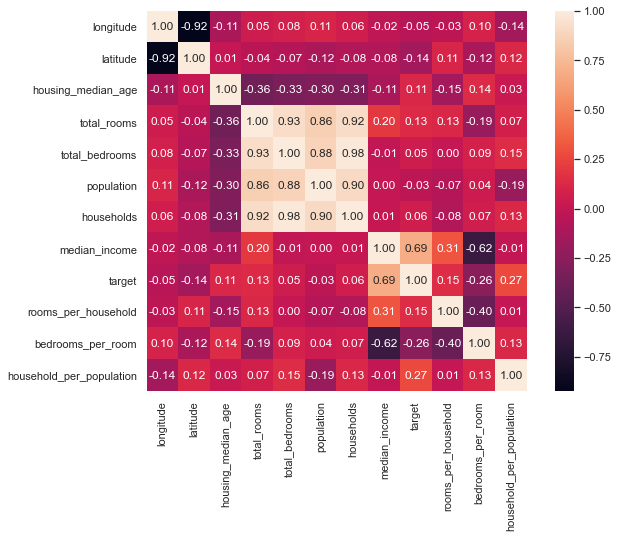

In [15]:
train_=train.copy()
train_['rooms_per_household']=train_['total_rooms']/train_['households']
train_['bedrooms_per_room']=train_['total_bedrooms']/train_['total_rooms']
train_['household_per_population']=train_['households']/train_['population']

plt.figure(figsize=(10,7))
sns.heatmap(train_.corr(),annot=True,fmt='.2f',square=True)
plt.show()

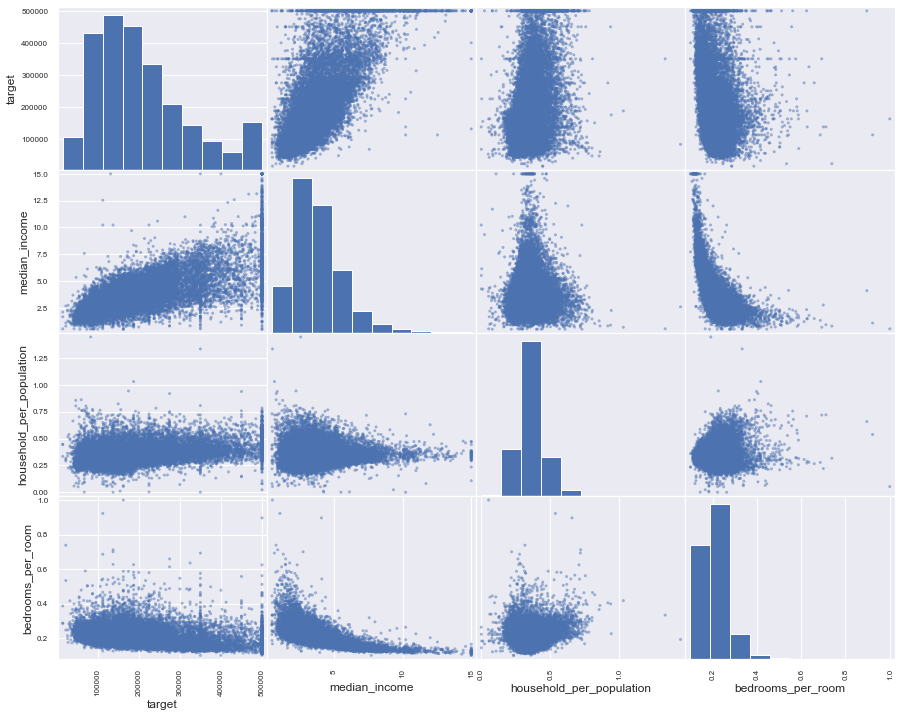

In [16]:
# target과의 상관계수가 높은 3가지 데이터의 산점도
attribute=['target','median_income','household_per_population','bedrooms_per_room']
scatter_matrix(train_[attribute],figsize=(15,12))
plt.show()

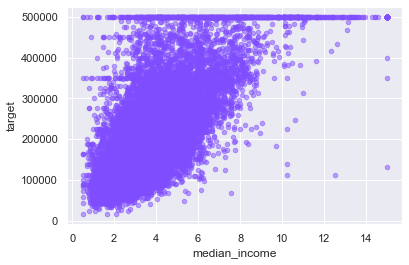

In [17]:
# 중간 소득 대 주택 가격 산점도
train.plot(kind='scatter',x='median_income',y='target',alpha=0.5,c=np.array([0.5,0.3,1]).reshape(1,-1))
plt.show()

In [18]:
train['ocean_proximity'].value_counts() # ocean_proximity값 확인

<1H OCEAN     7200
INLAND        5220
NEAR OCEAN    2100
NEAR BAY      1832
ISLAND           2
Name: ocean_proximity, dtype: int64

In [19]:
# 범주형 데이터를 원핫인코딩하여 숫자로 바꿈
encoder=LabelBinarizer()
ocean_data=train['ocean_proximity']
ocean_1hot_data=encoder.fit_transform(ocean_data)

In [20]:
ocean_1hot_data

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       ...,
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0]])

In [21]:
# train_set과 val_set으로 분리하기 위해 data_set 만들기
encoder=LabelBinarizer()
ocean_1hot_data=encoder.fit_transform(train_['ocean_proximity'])
data_set=train_.drop('ocean_proximity',axis=1)

In [22]:
# train , validation set 분리
train_set , val_set,ocean_1hot_train,ocean_1hot_val =train_test_split(data_set,ocean_1hot_data,test_size=0.2,random_state=7)

# 데이터 개수 확인
len(train_set),len(val_set),len(train_)

(13083, 3271, 16354)

In [23]:
# train set의 target 분리
train_data=train_set.drop('target',axis=1)
train_target=train_set['target']

# validation set의 target 분리
val_data=val_set.drop('target',axis=1)
val_target=val_set['target']

In [24]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13083 entries, 9993 to 12582
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 13083 non-null  float64
 1   latitude                  13083 non-null  float64
 2   housing_median_age        13083 non-null  int64  
 3   total_rooms               13083 non-null  int64  
 4   total_bedrooms            13083 non-null  float64
 5   population                13083 non-null  int64  
 6   households                13083 non-null  int64  
 7   median_income             13083 non-null  float64
 8   rooms_per_household       13083 non-null  float64
 9   bedrooms_per_room         13083 non-null  float64
 10  household_per_population  13083 non-null  float64
dtypes: float64(7), int64(4)
memory usage: 1.2 MB


In [25]:
# 성능 평가 지표
def RMSE(y, ypred):
    rmse = np.sqrt(np.mean((y-ypred)**2)) 
    return rmse

## Maximum likelihood 결과

 - x_data에  'rooms_per_household','bedrooms_per_room','household_per_population'추가하여 사용했을 때 성능이 더 좋음

In [26]:
def MLE(x, y):
    w = np.linalg.solve(x.T @ x, x.T @ y) 
    return w

In [27]:
def predict_MLE(x_test, w):
    pred = x_test @ w 
    return pred 

In [28]:
# 'rooms_per_household','bedrooms_per_room','household_per_population' 제외했을 때
train_data1=train_data.drop(['rooms_per_household','bedrooms_per_room','household_per_population'],axis=1)
val_data1=val_data.drop(['rooms_per_household','bedrooms_per_room','household_per_population'],axis=1)

In [29]:
# 데이터셋을 numpy로 변경
train_x=np.array(train_data1)
val_x=np.array(val_data1)
train_y=np.array(train_target).reshape(len(train_target),1)
val_y=np.array(val_target).reshape(len(val_target),1)

# 각 특성의 scale이 다르므로 각 특성의 평균을 0, 분산을 1로 변경하여 모든 특성들이 같은 스케일을 갖도록 한다.
std=StandardScaler()
std.fit(train_x)
train_x_std=std.transform(train_x)
val_x_std=std.transform(val_x)

N, D = train_x.shape
x_aug = np.hstack([np.ones((N,1)), train_x_std, ocean_1hot_train]) # ocean_proximity 원핫인코딩 데이터와 합치기

N,D=val_x.shape
x_test_aug = np.hstack([np.ones((N,1)), val_x_std, ocean_1hot_val]) # ocean_proximity 원핫인코딩 데이터와 합치기

In [30]:
w_pred=MLE(x_aug, train_y) # w구하기

train_pred=predict_MLE(x_aug, w_pred) # train_data 성능
train_loss=RMSE(train_y,train_pred)

val_pred=predict_MLE(x_test_aug, w_pred) # test_data 성능
val_loss=RMSE(val_y,val_pred)

print("train_set 성능 : %.2f val_set 성능 : %.2f"%(train_loss,val_loss))

train_set 성능 : 68952.65 val_set 성능 : 69191.05


In [31]:
## 'rooms_per_household','bedrooms_per_room','population_per_household' 특성을 추가 했을 때
# 데이터셋을 numpy로 변경
train_x=np.array(train_data)
val_x=np.array(val_data)
train_y=np.array(train_target).reshape(len(train_target),1)
val_y=np.array(val_target).reshape(len(val_target),1)

# 각 특성의 scale이 다르므로 각 특성의 평균을 0, 분산을 1로 변경하여 모든 특성들이 같은 스케일을 갖도록 한다.
std=StandardScaler()
std.fit(train_x)
train_x_std=std.transform(train_x)
val_x_std=std.transform(val_x)

N, D = train_x.shape
x_aug = np.hstack([np.ones((N,1)),train_x_std, ocean_1hot_train]) # ocean_proximity 원핫인코딩 데이터와 합치기
N,D=val_x.shape
x_test_aug = np.hstack([np.ones((N,1)), val_x_std, ocean_1hot_val]) # ocean_proximity 원핫인코딩 데이터와 합치기

In [32]:
w_pred=MLE(x_aug, train_y) # w구하기

train_pred=predict_MLE(x_aug, w_pred) # train_data 성능
train_loss=RMSE(train_y,train_pred)

val_pred=predict_MLE(x_test_aug, w_pred) # test_data 성능
val_loss=RMSE(val_y,val_pred)

print("train_set 성능 : %.2f val_set 성능 : %.2f"%(train_loss,val_loss))

train_set 성능 : 65788.79 val_set 성능 : 64963.30


## 경사하강법 결과 

In [33]:
train_x_new = np.hstack([train_x_std, ocean_1hot_train]) # ocean_proximity 원핫인코딩 데이터와 합치기
val_x_new = np.hstack([val_x_std, ocean_1hot_val]) # ocean_proximity 원핫인코딩 데이터와 합치기
N,D=train_x_new.shape

# initialize weight : y = xw + b
w=np.ones((D,1))
b=np.ones(1)

In [34]:
## Traning 
losses=[] # 각 epoch에 따른 loss값 담기
avgloss=[]
learning_rate=0.8 # 학습 초반에 빠르게 loss를 줄이기 위해 learning_rate를 크게 설정

v=0
v_b=0
m=0.9 # momentum 계수

for epoch in range(57):
    sum1=0
    sum2=0
    sum3=0
    
    # learning_rate 튜닝
    if (epoch==56):
        learning_rate=0.01
              
    for i in range(len(train_target)):
        xin = train_x_new[i].reshape(1,D)
        ans = train_y[i]
        
        ypred=np.dot(xin,w)+b
        
        sum1+=np.dot(xin.T,(ypred-ans))
        sum2+=(ypred-ans)
        sum3+=(ans-ypred)**2
        
    # 오차 계산 - RMSE   
    loss=np.sqrt(sum3 /len(train_target))
    
    ## 경사 하강법
    # 델타값 초기화
    delta_w = np.zeros((D,1))
    delta_b = np.zeros(1)
    
    # loss 편미분
    delta_b=sum2/loss
    delta_w=sum1/loss
    
    # Momentum 식 구현하여 사용
    v = m*v - learning_rate * delta_w
    w = w + v
    v_b = m*v_b - learning_rate * delta_b
    b = b + v_b
    
    if (epoch%3==2):
        # train_set 성능 결과
        train_ypred=np.dot(train_x_new,w)+b
        train_loss=RMSE(train_y,train_ypred)

        # val_set 성능 결과
        val_ypred=np.dot(val_x_new,w)+b
        val_loss=RMSE(val_y,val_ypred)
        print("epoch[{}/{}] loss: {:.2f}, train_set 성능 : {:.2f} , val_set 성능 : {:.2f}".format(epoch+1,57,float(loss),
                                                                                              train_loss,val_loss))
    losses.append(loss)

epoch[3/57] loss: 201468.08, train_set 성능 : 169725.33 , val_set 성능 : 170539.41
epoch[6/57] loss: 96480.13, train_set 성능 : 77078.03 , val_set 성능 : 74691.31
epoch[9/57] loss: 106968.37, train_set 성능 : 122480.49 , val_set 성능 : 119825.55
epoch[12/57] loss: 125200.78, train_set 성능 : 113744.89 , val_set 성능 : 111474.82
epoch[15/57] loss: 81037.15, train_set 성능 : 72864.16 , val_set 성능 : 72211.33
epoch[18/57] loss: 84781.27, train_set 성능 : 91005.26 , val_set 성능 : 91607.99
epoch[21/57] loss: 87452.69, train_set 성능 : 79801.14 , val_set 성능 : 79453.66
epoch[24/57] loss: 70135.76, train_set 성능 : 72370.71 , val_set 성능 : 71102.33
epoch[27/57] loss: 77658.77, train_set 성능 : 76341.34 , val_set 성능 : 74698.74
epoch[30/57] loss: 69738.24, train_set 성능 : 68657.65 , val_set 성능 : 67384.88
epoch[33/57] loss: 71248.04, train_set 성능 : 71562.94 , val_set 성능 : 71084.70
epoch[36/57] loss: 68409.87, train_set 성능 : 67100.94 , val_set 성능 : 66791.06
epoch[39/57] loss: 68047.19, train_set 성능 : 68805.62 , val_set 성능 : 67

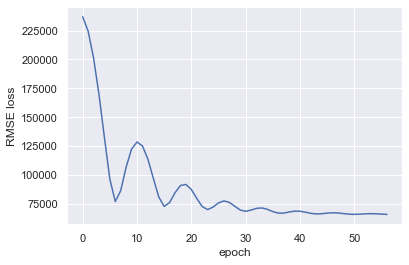

In [35]:
# loss 그래프
loss1 =  np.array(losses)
plt.plot(loss1.reshape(57))
plt.xlabel("epoch")
plt.ylabel("RMSE loss");

In [36]:
# Train_set 성능
train_ypred=np.dot(train_x_new,w)+b
train_rmse=RMSE(train_y,train_ypred)

# Validation_set 성능
val_ypred=np.dot(val_x_new,w)+b
val_rmse=RMSE(val_y,val_ypred)

print("train_set 성능 : {:.2f} , val_set 성능 : {:.2f}".format(train_rmse,val_rmse))

train_set 성능 : 65937.13 , val_set 성능 : 64823.44


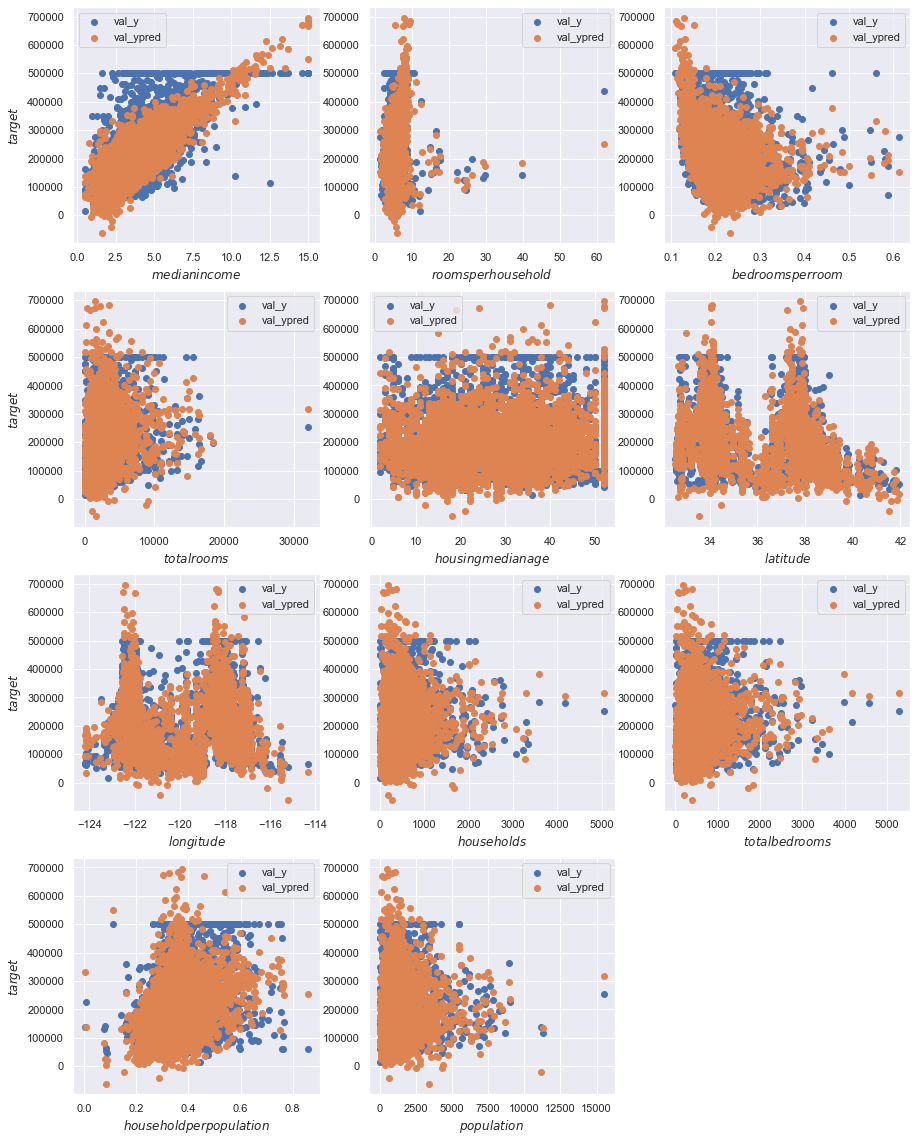

In [37]:
# 각 특성에 대한 val_y와 pred값 비교 그래프 
x1=np.array(val_set['median_income'])
x2=np.array(val_set['rooms_per_household'])
x3=np.array(val_set['bedrooms_per_room'])
x4=np.array(val_set['total_rooms'])
x5=np.array(val_set['housing_median_age'])
x6=np.array(val_set['latitude'])
x7=np.array(val_set['longitude'])
x8=np.array(val_set['households'])
x9=np.array(val_set['total_bedrooms'])
x10=np.array(val_set['household_per_population'])
x11=np.array(val_set['population'])

plt.figure(figsize=(15,20))
plt.subplot(431)
plt.scatter(x1, val_y)
plt.scatter(x1, val_ypred)
plt.xlabel("$median income$")
plt.ylabel("$target$")
plt.legend(['val_y','val_ypred'])

plt.subplot(432)
plt.scatter(x2, val_y)
plt.scatter(x2, val_ypred)
plt.xlabel("$rooms per household$")
plt.legend(['val_y','val_ypred'])


plt.subplot(433)
plt.scatter(x3, val_y)
plt.scatter(x3, val_ypred)
plt.xlabel("$bedrooms per room$")
plt.legend(['val_y','val_ypred'])


plt.subplot(434)
plt.scatter(x4, val_y)
plt.scatter(x4, val_ypred)
plt.xlabel("$total rooms$")
plt.ylabel("$target$")
plt.legend(['val_y','val_ypred'])

plt.subplot(435)
plt.scatter(x5, val_y)
plt.scatter(x5, val_ypred)
plt.xlabel("$housing median age$")
plt.legend(['val_y','val_ypred'])


plt.subplot(436)
plt.scatter(x6, val_y)
plt.scatter(x6, val_ypred)
plt.xlabel("$latitude$")
plt.legend(['val_y','val_ypred'])


plt.subplot(437)
plt.scatter(x7, val_y)
plt.scatter(x7, val_ypred)
plt.xlabel("$longitude$")
plt.ylabel("$target$")
plt.legend(['val_y','val_ypred'])

plt.subplot(438)
plt.scatter(x8, val_y)
plt.scatter(x8, val_ypred)
plt.xlabel("$households$")
plt.legend(['val_y','val_ypred'])


plt.subplot(439)
plt.scatter(x9, val_y)
plt.scatter(x9, val_ypred)
plt.xlabel("$total bedrooms$")
plt.legend(['val_y','val_ypred'])

plt.subplot(4,3,10)
plt.scatter(x10, val_y)
plt.scatter(x10, val_ypred)
plt.xlabel("$household per population$")
plt.ylabel("$target$")
plt.legend(['val_y','val_ypred'])

plt.subplot(4,3,11)
plt.scatter(x11, val_y)
plt.scatter(x11, val_ypred)
plt.xlabel("$population$")
plt.legend(['val_y','val_ypred']);

In [38]:
# 데이터 셋에서 'target'값은 최대값이 500000이였으므로 ypred값들 중에 500000이상인 값은 500000으로 바꾸어줌
for i in range(len(train_ypred)): # train_ypred
    if train_ypred[i]>500000:
        train_ypred[i]=500000
train_rmse=RMSE(train_y,train_ypred)

for i in range(len(val_ypred)): # val_ypred
    if val_ypred[i]>500000:
        val_ypred[i]=500000
val_rmse=RMSE(val_y,val_ypred)
print("train_set 성능 : {:.2f} , val_set 성능 : {:.2f}".format(train_rmse,val_rmse))

train_set 성능 : 64845.70 , val_set 성능 : 64131.13


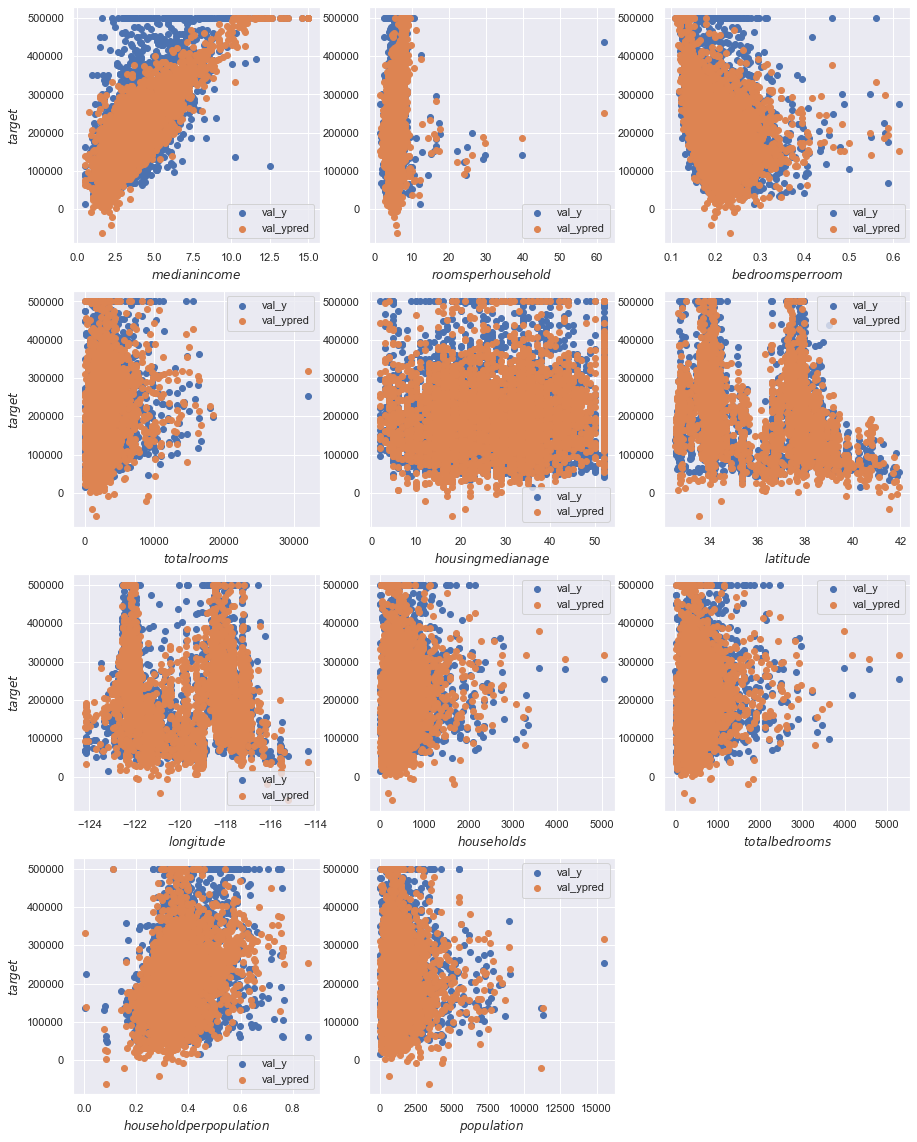

In [39]:
# 각 특성에 대한 val_y와 pred값 비교 그래프 
x1=np.array(val_set['median_income'])
x2=np.array(val_set['rooms_per_household'])
x3=np.array(val_set['bedrooms_per_room'])
x4=np.array(val_set['total_rooms'])
x5=np.array(val_set['housing_median_age'])
x6=np.array(val_set['latitude'])
x7=np.array(val_set['longitude'])
x8=np.array(val_set['households'])
x9=np.array(val_set['total_bedrooms'])
x10=np.array(val_set['household_per_population'])
x11=np.array(val_set['population'])

plt.figure(figsize=(15,20))
plt.subplot(431)
plt.scatter(x1, val_y)
plt.scatter(x1, val_ypred)
plt.xlabel("$median income$")
plt.ylabel("$target$")
plt.legend(['val_y','val_ypred'])

plt.subplot(432)
plt.scatter(x2, val_y)
plt.scatter(x2, val_ypred)
plt.xlabel("$rooms per household$")
plt.legend(['val_y','val_ypred'])


plt.subplot(433)
plt.scatter(x3, val_y)
plt.scatter(x3, val_ypred)
plt.xlabel("$bedrooms per room$")
plt.legend(['val_y','val_ypred'])


plt.subplot(434)
plt.scatter(x4, val_y)
plt.scatter(x4, val_ypred)
plt.xlabel("$total rooms$")
plt.ylabel("$target$")
plt.legend(['val_y','val_ypred'])

plt.subplot(435)
plt.scatter(x5, val_y)
plt.scatter(x5, val_ypred)
plt.xlabel("$housing median age$")
plt.legend(['val_y','val_ypred'])


plt.subplot(436)
plt.scatter(x6, val_y)
plt.scatter(x6, val_ypred)
plt.xlabel("$latitude$")
plt.legend(['val_y','val_ypred'])


plt.subplot(437)
plt.scatter(x7, val_y)
plt.scatter(x7, val_ypred)
plt.xlabel("$longitude$")
plt.ylabel("$target$")
plt.legend(['val_y','val_ypred'])

plt.subplot(438)
plt.scatter(x8, val_y)
plt.scatter(x8, val_ypred)
plt.xlabel("$households$")
plt.legend(['val_y','val_ypred'])


plt.subplot(439)
plt.scatter(x9, val_y)
plt.scatter(x9, val_ypred)
plt.xlabel("$total bedrooms$")
plt.legend(['val_y','val_ypred'])

plt.subplot(4,3,10)
plt.scatter(x10, val_y)
plt.scatter(x10, val_ypred)
plt.xlabel("$household per population$")
plt.ylabel("$target$")
plt.legend(['val_y','val_ypred'])

plt.subplot(4,3,11)
plt.scatter(x11, val_y)
plt.scatter(x11, val_ypred)
plt.xlabel("$population$")
plt.legend(['val_y','val_ypred']);